### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [54]:
data = pd.read_csv('coupons.csv')
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [55]:
data["Bar"].value_counts()


,count
Bar,
never,5197
less1,3482
1~3,2473
4~8,1076
gt8,349


In [56]:
data["car"].value_counts()

,count
car,
Scooter and motorcycle,22
Mazda5,22
do not drive,22
crossover,21
Car that is too old to install Onstar :D,21


In [57]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [58]:
# summary of data set
print(data.describe())

        temperature  has_children  toCoupon_GEQ5min  toCoupon_GEQ15min  \
count  12684.000000  12684.000000           12684.0       12684.000000   
mean      63.301798      0.414144               1.0           0.561495   
std       19.154486      0.492593               0.0           0.496224   
min       30.000000      0.000000               1.0           0.000000   
25%       55.000000      0.000000               1.0           0.000000   
50%       80.000000      0.000000               1.0           1.000000   
75%       80.000000      1.000000               1.0           1.000000   
max       80.000000      1.000000               1.0           1.000000   

       toCoupon_GEQ25min  direction_same  direction_opp             Y  
count       12684.000000    12684.000000   12684.000000  12684.000000  
mean            0.119126        0.214759       0.785241      0.568433  
std             0.323950        0.410671       0.410671      0.495314  
min             0.000000        0.000000     

2. Investigate the dataset for missing or problematic data.

In [59]:
# Check for missing values
print(data.isnull().sum())


destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


3. Decide what to do about your missing data -- drop, replace, other...

In [60]:
# Check for the selected numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
print(numerical_columns)
# Check for missing values
print(data[numerical_columns].isnull().sum())

Index(['temperature', 'has_children', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min',
       'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'Y'],
      dtype='object')
temperature          0
has_children         0
toCoupon_GEQ5min     0
toCoupon_GEQ15min    0
toCoupon_GEQ25min    0
direction_same       0
direction_opp        0
Y                    0
dtype: int64


In [61]:
# Fill missing values with mode for categorical
data.fillna(data.mode().iloc[0], inplace=True)
print(data.describe())
print(data.isnull().sum())


        temperature  has_children  toCoupon_GEQ5min  toCoupon_GEQ15min  \
count  12684.000000  12684.000000           12684.0       12684.000000   
mean      63.301798      0.414144               1.0           0.561495   
std       19.154486      0.492593               0.0           0.496224   
min       30.000000      0.000000               1.0           0.000000   
25%       55.000000      0.000000               1.0           0.000000   
50%       80.000000      0.000000               1.0           1.000000   
75%       80.000000      1.000000               1.0           1.000000   
max       80.000000      1.000000               1.0           1.000000   

       toCoupon_GEQ25min  direction_same  direction_opp             Y  
count       12684.000000    12684.000000   12684.000000  12684.000000  
mean            0.119126        0.214759       0.785241      0.568433  
std             0.323950        0.410671       0.410671      0.495314  
min             0.000000        0.000000     

4. What proportion of the total observations chose to accept the coupon?


In [62]:
# the number of observations who accepted the coupon
acceptance_proportion = data["Y"].value_counts(normalize = True)

print(f'Proportion of observations that accepted the coupon: {acceptance_proportion[1]:.2%}')

Proportion of observations that accepted the coupon: 56.84%


5. Use a bar plot to visualize the `coupon` column.

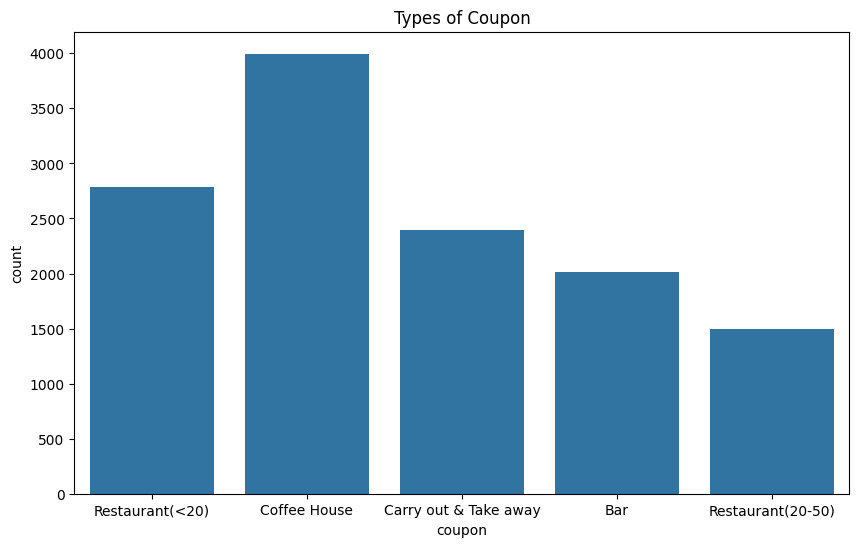

In [63]:
# Bar plot to show the type of coupons
plt.figure(figsize=(10, 6))
sns.countplot(x='coupon', data = data)
plt.title('Types of Coupon')
plt.show()


6. Use a histogram to visualize the temperature column.

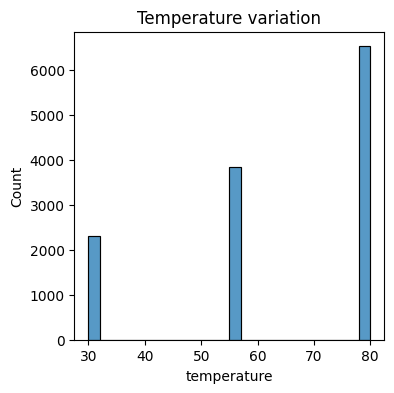

In [64]:
# Histogram to see the temperature
plt.figure(figsize=(4,4))
sns.histplot(x='temperature', data = data)
plt.title('Temperature variation')
plt.show()


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [65]:
bar_df = data[data["coupon"] == "Bar"]
bar_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2017 entries, 9 to 12682
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           2017 non-null   object
 1   passanger             2017 non-null   object
 2   weather               2017 non-null   object
 3   temperature           2017 non-null   int64 
 4   time                  2017 non-null   object
 5   coupon                2017 non-null   object
 6   expiration            2017 non-null   object
 7   gender                2017 non-null   object
 8   age                   2017 non-null   object
 9   maritalStatus         2017 non-null   object
 10  has_children          2017 non-null   int64 
 11  education             2017 non-null   object
 12  occupation            2017 non-null   object
 13  income                2017 non-null   object
 14  car                   2017 non-null   object
 15  Bar                   2017 non-null   obje

2. What proportion of bar coupons were accepted?


In [66]:
bar_acc_proportion = bar_df["Y"].value_counts(normalize = True)
print(f'Proportion of bar coupons accepted: {bar_acc_proportion[1]:.2%}')

Proportion of bar coupons accepted: 41.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


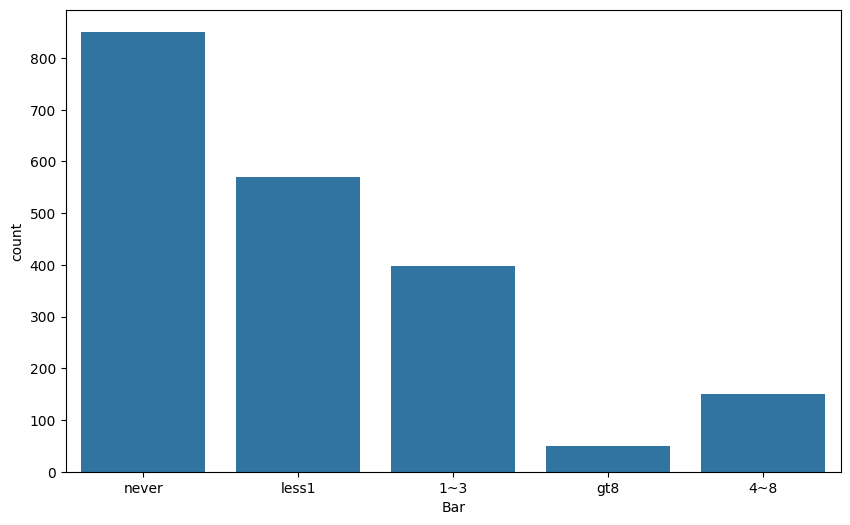

Acceptance rate for those who go to a bar 3 or fewer times: 52.74%
Acceptance rate for those who go to a bar more than 3 times: 76.88%


In [67]:
# Bar plot to show the Bar column
plt.figure(figsize=(10, 6))
sns.countplot(x='Bar', data = bar_df)
#plt.title('Times to go bar')
plt.show()

# Filter rows where bar frequency is either 3 or less times
three_or_less = bar_df[bar_df["Bar"].isin(["less1", "1~3"])]

# Filter rows where bar frequency is more than 3 times
more_than_three = bar_df[bar_df["Bar"].isin(["gt8", "4~8"])]

# Calculate the acceptance rate for those who accepted the coupon (Y = 1)
acceptance_rate_three_or_less = three_or_less["Y"].mean()

acceptance_rate_more_than_three = more_than_three["Y"].mean()

#Print the acceptance rate
print(f'Acceptance rate for those who go to a bar 3 or fewer times: {acceptance_rate_three_or_less:.2%}')
print(f'Acceptance rate for those who go to a bar more than 3 times: {acceptance_rate_more_than_three:.2%}')



4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


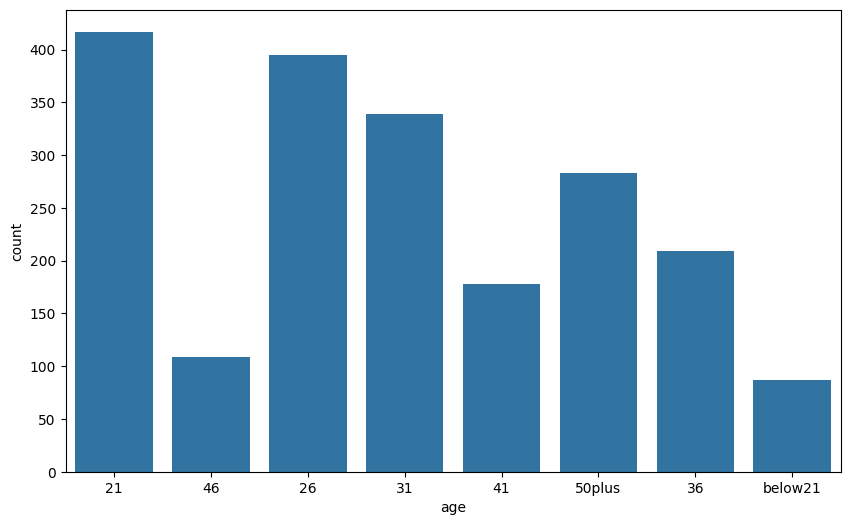

Acceptance rate for drivers who go to a bar more than once a month and are over the age of 25: 69.52%
Acceptance rate for drivers who go to a bar more than once a month and are below the age of 25: 67.05%


In [68]:
# Calculate the acceptance rate for the drivers who go to bar more than once a month and are over the age of 25

# look up the age column to check age distribution and plot the bar graph
bar_df["age"].value_counts()
plt.figure(figsize=(10, 6))
sns.countplot(x='age', data = bar_df)
plt.show()
# Filter rows where bar frequency is more than once a month and the driver age is over 25
bar_freq_list = ["1~3", "gt8", "4~8"]
age_list = ["26","31","36","41","46", "50plus"]

over_25 = bar_df.query('Bar in @bar_freq_list and age in @age_list')
# Calculate the acceptance rate for those who accepted the coupon (Y = 1)
acceptance_rate_over_25 = over_25["Y"].mean()
# Print the acceptance rate
print(f'Acceptance rate for drivers who go to a bar more than once a month and are over the age of 25: {acceptance_rate_over_25:.2%}')

# Filter rows where bar frequency is more than once a month and the driver age is below 25
bar_freq_list = ["1~3", "gt8", "4~8"]
age_list2 = ["21","below21"]

below_25 = bar_df.query('Bar in @bar_freq_list and age in @age_list2')
# Calculate the acceptance rate for those who accepted the coupon (Y = 1)
acceptance_rate_below_25 = below_25["Y"].mean()
# Print the acceptance rate
print(f'Acceptance rate for drivers who go to a bar more than once a month and are below the age of 25: {acceptance_rate_below_25:.2%}')

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [69]:
# first look up the passengers and occupations columns
#print(bar_df["passanger"].value_counts())
#print(bar_df["occupation"].value_counts())

# Filter rows where drivers who go to bars more than once a month and had passengers that were not a kid and had
# occupations other than farming, fishing, or forestry.
passenger_list =  ["Friend(s)", "partner"]
occupation_list = ["farming", "fishing", "forestry"]

bar_pass_occ = bar_df.query('Bar in ["1~3", "4~8", "gt8"] and passanger != "Kid(s)" and occupation not in ["Farming", "Fishing", "Forestry"]')

# Calculate the acceptance rate for the filtered rows (Y = 1 means coupon was accepted)
acceptance_rate = bar_pass_occ['Y'].mean()

# Print the acceptance rate
print(f'Acceptance rate for drivers who go to bars more than once a month, had no kid passengers, and are not in farming, fishing, or forestry: {acceptance_rate:.2%}')


Acceptance rate for drivers who go to bars more than once a month, had no kid passengers, and are not in farming, fishing, or forestry: 71.32%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [70]:
# acceptance rate of those drivers who go to bars more than once a month, had no kid passenger and were not widowed
# first look up the marital status column
#print(bar_df["maritalStatus"].value_counts())
# find the freq of drivers who go to bars more than once a month, had no kid and not widowed
bar_nokid_notwid = bar_df.query('Bar in ["1~3", "4~8", "gt8"] and passanger != "Kid(s)" and maritalStatus != "Widowed"')
#calculate the acceptance rate
acc_rate_bar_nokid_notwid  = bar_nokid_notwid["Y"].mean()
print(f'Acceptance rate for drivers who go to bars more than once a month, had no kid passengers, and are not widowed: {acc_rate_bar_nokid_notwid:.2%}')

#calculate the acceptance rate of those drivers who go to bars more than once a month and are under the age of 30
#age_below30 = ["21","below21", "26"]
bar_nokid_below30 = bar_df.query('Bar in ["1~3", "4~8", "gt8"] and passanger != "Kid(s)" and age in ["21","below21", "26"]')
acc_rate_bar_nokid_below30  = bar_nokid_below30["Y"].mean()
print(f'Acceptance rate for drivers who go to bars more than once a month, had no kid passengers, and are under the age of 30: {acc_rate_bar_nokid_below30:.2%}')

#calculate the acceptance rate of those drivers who go to bars more than once a month and go to cheap restaurants more than 4 times a month and income is less than 50K.
# look up the restaurants column
#print(bar_df["RestaurantLessThan20"].value_counts())
# look up the income column
#print(bar_df["income"].value_counts())
bar_cheaprest_income_below50k = bar_df.query('Bar in ["1~3", "4~8", "gt8"] and RestaurantLessThan20 in ["4~8", "gt8"] and income in ["$12500 - $24999","$37500 - $49999", "$25000 - $37499", "Less than $12500"]')
acc_rate_bar_cheaprest_income_below50k  = bar_cheaprest_income_below50k["Y"].mean()
print(f'Acceptance rate for drivers who go to bars more than once a month, go to cheap restaurants more than 4 times a month and income is less than 50K: {acc_rate_bar_cheaprest_income_below50k:.2%}')

Acceptance rate for drivers who go to bars more than once a month, had no kid passengers, and are not widowed: 71.32%
Acceptance rate for drivers who go to bars more than once a month, had no kid passengers, and are under the age of 30: 72.02%
Acceptance rate for drivers who go to bars more than once a month, go to cheap restaurants more than 4 times a month and income is less than 50K: 76.92%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

## **Observations Summary**

Based on these observations, it seems that the acceptance of bar coupons is high 41%. Also the drivers who visit the bar frequently (more than 3 times a month) are more likely to accept the coupon. The drivers who visit bar more than once a month and go to cheap restaurants more than 4 times and with less than 50K income are more likely to accept the coupon than the drivers who go to bars more than once a month, had no kid passengers, and are not widowed and are under the age of 30.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

1. Create a new DataFrame that contains just the "Coffee House" coupons.

In [71]:
coffee_df = data[data["coupon"] == "Coffee House"]
coffee_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3996 entries, 1 to 12681
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           3996 non-null   object
 1   passanger             3996 non-null   object
 2   weather               3996 non-null   object
 3   temperature           3996 non-null   int64 
 4   time                  3996 non-null   object
 5   coupon                3996 non-null   object
 6   expiration            3996 non-null   object
 7   gender                3996 non-null   object
 8   age                   3996 non-null   object
 9   maritalStatus         3996 non-null   object
 10  has_children          3996 non-null   int64 
 11  education             3996 non-null   object
 12  occupation            3996 non-null   object
 13  income                3996 non-null   object
 14  car                   3996 non-null   object
 15  Bar                   3996 non-null   obje

In [73]:
# Calculate the proportion of coffe house coupons accepted
coffee_acc_proportion = coffee_df["Y"].value_counts(normalize = True)
print(f'Proportion of coffee coupons accepted: {coffee_acc_proportion[1]:.2%}')

Proportion of coffee coupons accepted: 49.92%


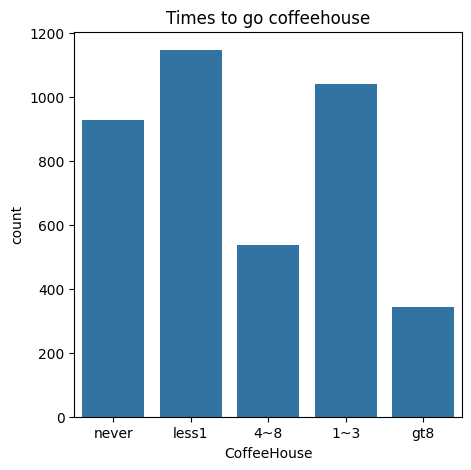

In [72]:
# Bar plot of coffeehouse to see the distribution
plt.figure(figsize=(5, 5))
sns.countplot(x='CoffeeHouse', data = coffee_df)
plt.title('Times to go coffeehouse')
plt.show()

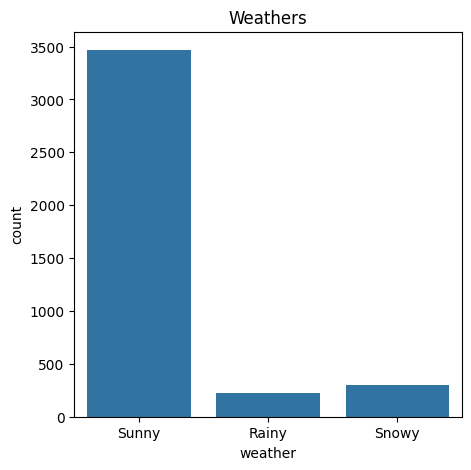

In [86]:
# Bar plot of coffeehouse to see the distribution
plt.figure(figsize=(5, 5))
sns.countplot(x='weather', data = coffee_df)
plt.title('Weathers')
plt.show()

In [74]:
# Calulate the acceptance rate among those who went to a coffee house 3 or fewer times a month to those who went more.

# Filter rows where coffee frequency is either 3 or less times
coffee_three_or_less = coffee_df[coffee_df["CoffeeHouse"].isin(["less1", "1~3"])]

# # Filter rows where coffee frequency is more than 3 times
coffee_more_than_three = coffee_df[coffee_df["CoffeeHouse"].isin(["gt8", "4~8"])]

# Calculate the acceptance rate for those who accepted the coupon (Y = 1)
acceptance_rate_coffee_three_or_less = coffee_three_or_less["Y"].mean()

acceptance_rate_coffee_more_than_three = coffee_more_than_three["Y"].mean()

# Print the acceptance rate
print(f'Acceptance rate for those who go to a coffee house 3 or fewer times: {acceptance_rate_coffee_three_or_less:.2%}')
print(f'Acceptance rate for those who go to a coffee house more than 3 times: {acceptance_rate_coffee_more_than_three:.2%}')


Acceptance rate for those who go to a coffee house 3 or fewer times: 56.01%
Acceptance rate for those who go to a coffee house more than 3 times: 67.50%


2. Compare the acceptance rates between those drivers who:

- go to coffehouse more than once a month, and going in the same direction, and weather is sunny
- go to coffehouse more than once a month and going in the opposite direction, and weather is snowy
- go to coffehouse more than once a month and to cheap restaurants more than 4 times a month and income is less than 50K.



In [97]:
# acceptance rate of those drivers who go to coffehouse more than once a month, and going in the same direction, and weather is sunny
# first look up the same direction column
#print(coffee_df["direction_same"].value_counts())
# find the freq of drivers who go to coffee house more than once a month, and going in the same direction, and had a kid
coffee_samedir_sunny = coffee_df.query('CoffeeHouse in ["1~3", "4~8", "gt8"] and weather == "Sunny" and direction_same == 1')
#calculate the acceptance rate
acc_rate_coffee_samedir_sunny  = coffee_samedir_sunny["Y"].mean()

print(f'Acceptance rate for drivers who go to coffehouse more than once a month, and going in the same direction, and weather is sunny: {acc_rate_coffee_samedir_sunny:.2%}')

#calculate the acceptance rate of those drivers who go to to coffehouse more than once a month and going in the opposite direction, and weather si snowy
#Look up the opposite direction column
#print(coffee_df["direction_opp"].value_counts())
coffee_oppdir_snowy = coffee_df.query('CoffeeHouse in ["1~3", "4~8", "gt8"] and weather == "Snowy" and direction_opp == 1')
acc_rate_coffee_oppdir_snowy = coffee_oppdir_snowy["Y"].mean()
print(f'Acceptance rate for drivers who go to to coffehouse more than once a month and going in the opposite direction, and weather is snowy: {acc_rate_coffee_oppdir_snowy:.2%}')

#calculate the acceptance rate of those drivers who go to coffehouse more than once a month and to cheap restaurants more than 4 times a month and income is less than 50K.

coffee_cheaprest_income_below50k = coffee_df.query('CoffeeHouse in ["1~3", "4~8", "gt8"] and RestaurantLessThan20 in ["4~8", "gt8"] and income in ["$12500 - $24999","$37500 - $49999", "$25000 - $37499", "Less than $12500"]')
acc_rate_coffee_cheaprest_income_below50k  = coffee_cheaprest_income_below50k["Y"].mean()
print(f'Acceptance rate for drivers who go to to coffehouse more than once a month and to cheap restaurants more than 4 times a month and income is less than 50K: {acc_rate_coffee_cheaprest_income_below50k:.2%}')

Acceptance rate for drivers who go to coffehouse more than once a month, and going in the same direction, and weather is sunny: 77.31%
Acceptance rate for drivers who go to to coffehouse more than once a month and going in the opposite direction, and weather is snowy: 38.78%
Acceptance rate for drivers who go to to coffehouse more than once a month and to cheap restaurants more than 4 times a month and income is less than 50K: 66.15%
